### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Now let us define the Decision Tree Algorithm

In [2]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                            test_size=0.3, random_state=1) 
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Accuracy is",dtree.score(X_test,y_test))
print('Decision Tree Classifer Created')

Accuracy is 0.9555555555555556
Decision Tree Classifer Created


### Let us visualize the Decision Tree to understand it better.



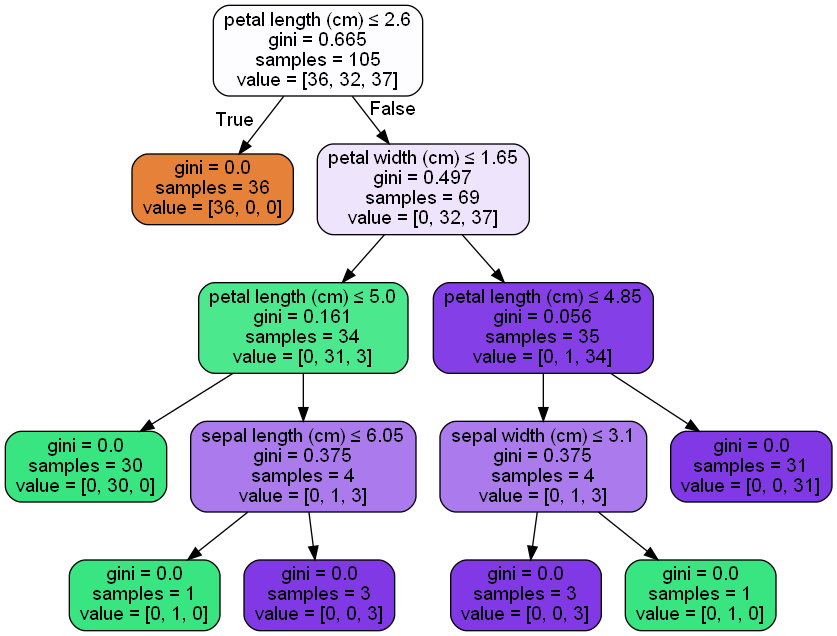

In [3]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Evaluating the model

In [4]:
from sklearn import metrics

ypred=dtree.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test, ypred))
print('r2_score: ',metrics.r2_score(y_test, ypred))
print('MSE :',metrics.mean_squared_error(y_test, ypred))
print('ME :',metrics.max_error(y_test, ypred))

MAE:  0.044444444444444446
r2_score:  0.9258649093904447
MSE : 0.044444444444444446
ME : 1


### Lets Predict a Value

In [5]:
inputs=[float(input("Enter " + feature_name)) for feature_name in iris.feature_names]
print("The predicted flower is :",iris.target_names[dtree.predict([inputs])].item())

The predicted flower is : setosa
